In this assignment, you will be familiar with the fundamental elements and processes in deep learning and models' training. you will: 
- Train a simple model for image classification using Tensorflow high-level APIs
- Customize training process in deep models
- Analyze the effect of using different activation functions in deep models

Try to keep your model as simple as possible (minimum number of layers and neurons with acceptable performance).

**Notes:** 
- When you submit your assignment, the output of every cell should be visible.
- You are not eligible to change any parts of the code except the predefined sections.
- You can add your implementation only in the predefined sections.

 

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential
from tensorflow import keras
import time
import os

For this assignment, we consider an image classification task using fashion mnist dataset. This dataset consists of 70 thousand images, and the target is determining the category of the images. This dataset has 10 different classes. More details about the dataset are provided here (https://www.kaggle.com/zalando-research/fashionmnist).

Before training our model, we need to load the dataset and pre-process it. In the following section, we load and normalize images properly.



In [2]:
batch_size = 32

print('Loading data...')
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.fashion_mnist.load_data()

print(len(data_train), 'train samples')
print(len(data_test), 'test samples')

data_train = data_train / 255
data_test = data_test / 255


Loading data...
60000 train samples
10000 test samples


In [3]:
num_classes = 10
label_train = tf.keras.utils.to_categorical(label_train, num_classes)
label_test = tf.keras.utils.to_categorical(label_test, num_classes)

In [4]:
hidden_units = 128

Now that we prepare our data, we need to create the model. There are three different ways in TensorFlow that you can use for creating deep models. Sequential API, Functional API, and model sub-classing.


# Sequential API
This is the simplest way to make deep models in TensorFlow. You can use this API for simple models containing a stack of layers. Using this API usually is not flexible enough for customization in deep models, so we go for other APIs for customizations.





In this part, we want you to implement a simple deep model for image classification using sequential API.



In [5]:
model = Sequential()
model.add(keras.layers.Input(shape = data_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=hidden_units, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Now we need to compile the model. Set appropriate parameters for loss function and metrics and tell us your reasons for your choices.



In [6]:
#### put your implementation here ####
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#### put your implementation here ####

In [7]:
history = model.fit(data_train, label_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2, )

Epoch 1/10
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6749 - accuracy: 0.7633 - val_loss: 0.4416 - val_accuracy: 0.8354
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8564 - val_loss: 0.4151 - val_accuracy: 0.8527
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3516 - accuracy: 0.8731 - val_loss: 0.3610 - val_accuracy: 0.8746
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8811 - val_loss: 0.3730 - val_accuracy: 0.8764
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3185 - accuracy: 0.8850 - val_loss: 0.3823 - val_accuracy: 0.8721
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.8932 - val_loss: 0.3768 - val_accuracy: 0.8782
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2929 - accuracy: 0.8970 - val_loss: 0.3878 - val_accuracy:

After training the model, we can evaluate it on the test set.



In [8]:
model.evaluate(data_test, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4391 - accuracy: 0.8698


[0.4390788674354553, 0.8697999715805054]

# Functional API
As we told before, sequential API is suitable to make plain deep models. However, the cost of simplicity is the limitation. For example, you cannot create the following model using sequential API.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/ResNets.svg/1200px-ResNets.svg.png" width="200"/>

</center>
<br>

In this case, we can use functional API to create our models. Read more about this API on this link(https://www.tensorflow.org/guide/keras/functional) and re-implement your model (what you made in the previous section) using this API. Compile and evaluate your model.




In [9]:
#### put your implementations here ####
img_inputs = keras.layers.Input(shape=data_train[0].shape)
flatten_image_inputs = keras.layers.Flatten()(img_inputs)
hidden_outputs = keras.layers.Dense(units=hidden_units, activation='relu')(flatten_image_inputs)
outputs = keras.layers.Dense(units=10, activation='softmax')(hidden_outputs)

model = keras.Model(inputs=img_inputs, outputs=outputs, name="fashion_mnist_model")

model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


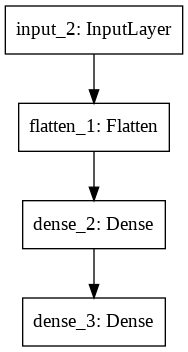

In [10]:
keras.utils.plot_model(model, "functional_model.png")

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(data_train, label_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2, )

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6617 - accuracy: 0.7707 - val_loss: 0.3961 - val_accuracy: 0.8549
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8562 - val_loss: 0.3765 - val_accuracy: 0.8673
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3520 - accuracy: 0.8726 - val_loss: 0.3958 - val_accuracy: 0.8585
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8803 - val_loss: 0.3683 - val_accuracy: 0.8773
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3168 - accuracy: 0.8893 - val_loss: 0.3771 - val_accuracy: 0.8698
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2976 - accuracy: 0.8940 - val_loss: 0.3703 - val_accuracy: 0.8761
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.8985 - val_loss: 0.3684 - val_accuracy:

In [13]:
model.evaluate(data_test, label_test)
#### put your implementations here ####

313/313 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8812


[0.4113749563694, 0.8812000155448914]

# Custom training loop

The fit function used in the previous sections for training models is an easy way that we usually employ to train deep models. There is another way that is more customizable and flexible to train models. In this method, we write every step of training, including feeding data to the model, calculating loss, applying gradients...

This section wants you to implement a custom training loop for the model you just made in the previous section.

First, we make batches of training and testing data.



In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((data_train, label_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((data_test, label_test))
test_dataset = test_dataset.batch(batch_size)

# re-compile the model
#### put your implementations here ####
img_inputs = keras.layers.Input(shape=data_train[0].shape)
flatten_image_inputs = keras.layers.Flatten()(img_inputs)
hidden_outputs = keras.layers.Dense(units=hidden_units, activation='relu')(flatten_image_inputs)
outputs = keras.layers.Dense(units=10, activation='softmax')(hidden_outputs)

model = keras.Model(inputs=img_inputs, outputs=outputs, name="fashion_mnist_model")

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#### put your implementations here ####

Now let's write the custom loop.

Define Optimizer, loss function, and metrics properly.




In [15]:
#### put your implementations here ####

optimizer = keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",)

loss_function = keras.losses.CategoricalCrossentropy(from_logits=True)

train_acc_metric = keras.metrics.CategoricalAccuracy()
test_acc_metric = keras.metrics.CategoricalAccuracy()
#### put your implementations here ####

In [16]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
 
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        #### put your implementations here ####
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_function(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 100 batches.
        if step % 100 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * 64))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training accuracy over epoch " + str(epoch) + ": %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()
  #### put your implementations here ####


Start of epoch 0
Training loss (for one batch) at step 0: 2.2473
Seen so far: 64 samples
Training loss (for one batch) at step 100: 0.6655
Seen so far: 6464 samples
Training loss (for one batch) at step 200: 0.7112
Seen so far: 12864 samples
Training loss (for one batch) at step 300: 0.4953
Seen so far: 19264 samples
Training loss (for one batch) at step 400: 0.5009
Seen so far: 25664 samples
Training loss (for one batch) at step 500: 0.6090
Seen so far: 32064 samples
Training loss (for one batch) at step 600: 0.5567
Seen so far: 38464 samples
Training loss (for one batch) at step 700: 0.4166
Seen so far: 44864 samples
Training loss (for one batch) at step 800: 0.4026
Seen so far: 51264 samples
Training loss (for one batch) at step 900: 0.5588
Seen so far: 57664 samples
Training loss (for one batch) at step 1000: 0.2890
Seen so far: 64064 samples
Training loss (for one batch) at step 1100: 0.6654
Seen so far: 70464 samples
Training loss (for one batch) at step 1200: 0.5065
Seen so far

Now implement a custom loop for evaluating your trained model.

In [17]:
#### put your implementations here ####
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))


    # Run a test loop at the end of each epoch.
    for x_batch_test, y_batch_test in test_dataset:
        test_logits = model(x_batch_test, training=False)
        # Update test metrics
        test_acc_metric.update_state(y_batch_test, test_logits)
    test_acc = test_acc_metric.result()
    test_acc_metric.reset_states()
    print("Test acc: %.4f" % (float(test_acc),))
#### put your implementations here ####


Start of epoch 0
Test acc: 0.8636

Start of epoch 1
Test acc: 0.8636


# Analyzing the effect of using different activation functions

In this part, we want you to analyze the effect of using different activation functions in deep models. 

As you already know, your image classification task is a multi-class classification. Based on this fact, we want you to set different activation functions (linear, softmax, or whatever you think is suitable) for the last layer (we call this layer the classifier layer) and analyze the model's predictions using these activation functions.

Toward this aim, first, re-implement one of the previous models, and then, use predict function to see the prediction of the model.



In [18]:
#### put your implementations here ####

def create_model(activation, loss):
  model = Sequential()
  model.add(keras.layers.Input(shape = data_train[0].shape))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=hidden_units, activation='relu'))
  model.add(keras.layers.Dense(units=10, activation=activation))

  model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])

  return model

In [19]:
dict = {'linear':'mse',
        'sigmoid':'binary_crossentropy',
        'softmax':'categorical_crossentropy'}

In [20]:
import sklearn.metrics
from matplotlib import pyplot as plt

In [24]:
confs = []
predictions = []
for key, value in dict.items():
  model = create_model(key, value)

  history = model.fit(data_train, label_train,
                      epochs=10,
                      batch_size=batch_size,
                      validation_split=0.2,
                      verbose=0)
  
  print('model with ', key, ' activation function and ', value, ' loss function: ')
  model.evaluate(data_test, label_test)
  print()


  label_pred = model.predict(data_test)
  predictions.append(label_pred[9])
  label_pred = np.argmax(label_pred, axis=1)
  label_true = np.argmax(label_test, axis=1)

  conf = sklearn.metrics.confusion_matrix(label_true, label_pred, normalize=None)
  confs.append(conf)



model with  linear  activation function and  mse  loss function: 
313/313 [==============================] - 1s 2ms/step - loss: 0.0221 - accuracy: 0.8710

model with  sigmoid  activation function and  binary_crossentropy  loss function: 
313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.8766

model with  softmax  activation function and  categorical_crossentropy  loss function: 
313/313 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8740



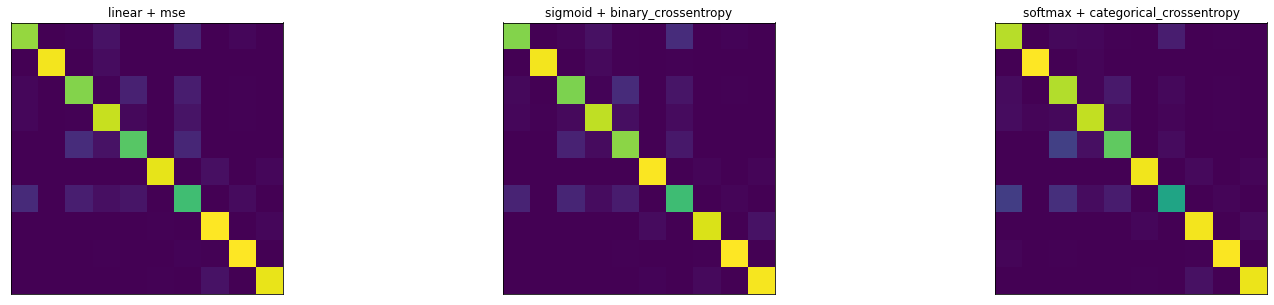

In [25]:
plt.figure(figsize=(25,5))
for i, key in enumerate(dict):
  plt.subplot(1,3,i+1)
  plt.imshow(confs[i])
  plt.xticks([])
  plt.yticks([])
  t = key + ' + ' + dict[key]
  plt.title(t)

In [26]:
for i, key in enumerate(dict):
  print('Confusion matrix for: ', key, ' + ', dict[key])
  print()
  print(confs[i])
  print()
  print('--------------------------------------------------')

Confusion matrix for:  linear  +  mse

[[821   3   9  49   3   0  99   0  16   0]
 [  3 958   3  31   2   0   1   0   2   0]
 [ 19   1 797  10  90   0  79   0   4   0]
 [ 18   2   4 896  22   0  51   0   6   1]
 [  0   0 124  46 724   0 104   0   2   0]
 [  0   0   0   0   0 940   0  40   1  19]
 [117   0  81  39  57   0 679   0  27   0]
 [  0   0   0   0   0   5   0 977   0  18]
 [  0   0   1   4   3   0  11   6 975   0]
 [  0   0   0   0   0   7   1  48   1 943]]

--------------------------------------------------
Confusion matrix for:  sigmoid  +  binary_crossentropy

[[800   3  14  44   4   1 124   0  10   0]
 [  2 963   1  25   4   0   4   0   1   0]
 [ 20   2 788   9 122   0  55   0   4   0]
 [ 18   5  24 886  35   0  29   0   3   0]
 [  1   1  92  30 810   0  63   0   3   0]
 [  0   0   0   1   0 973   0  12   2  12]
 [ 99   1 103  34  73   0 675   0  15   0]
 [  0   0   0   0   0  28   0 924   1  47]
 [  1   0   1   3   7   1   3   4 980   0]
 [  0   0   0   0   0   9   1  23  

In [ ]:
import numpy as np

Prediction for activation function linear  :
[-0.00263143 -0.00796274 -0.01925065 -0.00943992 -0.0081144  -0.04263551
 -0.01082398  1.0844814  -0.00498062  0.00676251]
------------------------------------------------------------
Prediction for activation function sigmoid  :
[5.5170175e-20 5.3388817e-19 6.6337853e-19 1.0529273e-16 6.9855701e-17
 3.2872063e-06 6.7715474e-18 9.9990523e-01 1.7442957e-07 1.2173721e-09]
------------------------------------------------------------
Prediction for activation function softmax  :
[6.8720373e-14 2.3416964e-16 1.6353407e-17 3.0392138e-16 7.4454592e-20
 3.4239183e-06 4.9872077e-16 9.9999654e-01 1.3923876e-09 9.7271835e-10]
------------------------------------------------------------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


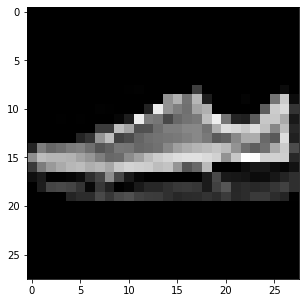

In [32]:
for i, key in enumerate(dict):
  print('Prediction for activation function', key, ' :')
  print(predictions[i])
  print('------------------------------------------------------------')
plt.figure(figsize=(25,5))
plt.imshow(data_test[9], cmap ='gray')
print(label_test[9])